In [1]:
import scipy.io
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import math
import os
from glob import glob

In [2]:
def add_gaussian_noise(img, SNR):
    # calcul de Pi
    Pi = np.sum(img**2) / img.size
    Pb = Pi / (10 ** (SNR/10))

    noise = math.sqrt(Pb) * np.random.normal(0, 1, size=img.shape)
    
    return np.clip(img + noise, 0, 1)

In [3]:
def loadmat(mat_path):
    mat = scipy.io.loadmat(mat_path)
    return np.array(mat.get(list(mat.keys())[-1]))

In [4]:
def tofloat(image):
    max = image.max()
    return image / max if max > 0 else image  

In [5]:
def saveImage(image, save_path):
    img = Image.fromarray((image * 255).astype(np.uint8))
    img.save(save_path)

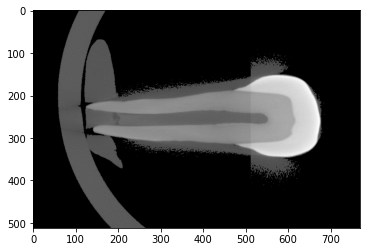

In [10]:
SNR = 1

mat_file = 'dentaire/45a_T2P2_MCT_apexouvert_norm.mat'

filename = 'MCT45a_norm'

data = loadmat(os.path.join('./mat', mat_file))

for i in range(data.shape[0]):
    image = tofloat(data[:,:,i])
    image_bruite = add_gaussian_noise(image, SNR)

    name_save_folder = os.path.join('./save_png', filename)
    if not os.path.exists(name_save_folder):
        os.mkdir(name_save_folder)

    original_save_path = os.path.join(name_save_folder, 'original')
    noisy_save_path = os.path.join(name_save_folder, 'noisy_' + str(SNR))

    if not os.path.exists(original_save_path):
        os.mkdir(original_save_path)

    if not os.path.exists(noisy_save_path):
        os.mkdir(noisy_save_path)

    #saveImage(image, os.path.join(original_save_path, '%04d'%i + '.png'))
    saveImage(image_bruite, os.path.join(noisy_save_path, '%04d'%i + '.png'))

plt.imshow(data[data.shape[0]//2], cmap='gray')
plt.show()

In [9]:
!ffmpeg -i ./save_png/shepp_logan256/original/%04d.png shepp_logan.y4m

ffmpeg version 4.4.2-0ubuntu0.22.04.1 Copyright (c) 2000-2021 the FFmpeg developers
  built with gcc 11 (Ubuntu 11.2.0-19ubuntu1)
  configuration: --prefix=/usr --extra-version=0ubuntu0.22.04.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --arch=amd64 --enable-gpl --disable-stripping --enable-gnutls --enable-ladspa --enable-libaom --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libcodec2 --enable-libdav1d --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libjack --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librabbitmq --enable-librubberband --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libsrt --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvidstab --enable-libvorbis --enable-libvpx --enab

In [13]:
SNR = 20

mat_folder = './mat/dentaire'

mat_paths = glob(os.path.join('./mat/dentaire', '*.mat'))

for path in mat_paths:

    mat = scipy.io.loadmat(path)
    key = list(mat.keys())[-1]
    data = np.array(mat.get(key))

    print(key)

    for i in range(data.shape[2]):
        img = tofloat(data[:,:,i])
        img_bruite = add_gaussian_noise(img, SNR)

        name_save_folder = os.path.join('./save_png', key)
        if not os.path.exists(name_save_folder):
            os.mkdir(name_save_folder)

        original_save_path = os.path.join(name_save_folder, 'original')
        noisy_save_path = os.path.join(name_save_folder, 'noisy')

        if not os.path.exists(original_save_path):
            os.mkdir(original_save_path)

        if not os.path.exists(noisy_save_path):
            os.mkdir(noisy_save_path)

        saveImage(img, os.path.join(original_save_path, '%04d'%i + '.png'))
        saveImage(img_bruite, os.path.join(noisy_save_path, '%04d'%i + '.png'))

MCT37c_norm
MCT14am_norm
MCT45a_norm
MCT18am_norm
MCT24a_norm
MCT16b_norm


In [11]:
mat_folder = './mat/dentaire'

mat_paths = glob(os.path.join('./mat/dentaire', '*.mat'))

name_save_folder = os.path.join('./save_png', 'dentaire_all_bmp')
if not os.path.exists(name_save_folder):
    os.mkdir(name_save_folder)

idx = 0

for path in mat_paths:
    
    mat = scipy.io.loadmat(path)
    key = list(mat.keys())[-1]
    data = np.array(mat.get(key))

    print(key)

    for i in range(data.shape[2]):

        img = tofloat(data[:,:,i])

        saveImage(img, os.path.join(name_save_folder, '%04d'%idx + '.bmp'))

        idx += 1

MCT37c_norm
MCT14am_norm
MCT45a_norm
MCT18am_norm
MCT24a_norm
MCT16b_norm
